# Medical Cost Personal Dataset

This dataset was retrieved [from](https://www.kaggle.com/mirichoi0218/insurance) that contained Medical Insurance Information. 

### Download & Libraries Set-Up

Let's download the [regressors] (https://pypi.org/project/regressors/) to perform a deeper Lineal Regression Analysis.

In [28]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [30]:
!pip install regressors
from regressors import stats

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

In [32]:
df = pd.read_csv('/work/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analyzing Procedure

- Lets check the Dataset shape

- Let's observe how data is distributed within the variable to predict on

(1338, 7)


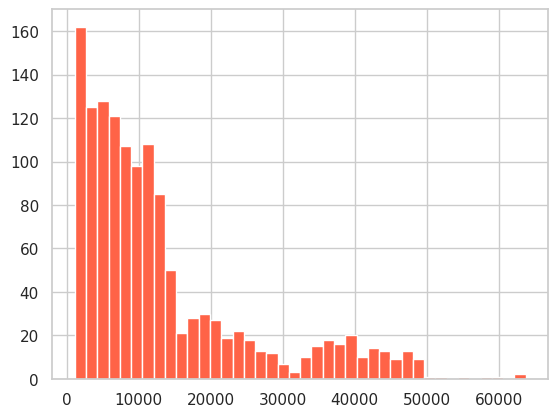

In [33]:
print(df.shape)
df.charges.hist(bins = 40, color = 'tomato')
plt.show()

### Something to zoom in the analysis: 

- According to this chart, is to understand what is happening with data above 50,000. There seems to be very little data on this side.

In [34]:
df[df.charges>50000]
df = df[df.charges<50000]

- In this case, since there are few data (6 of 1338), we will eliminate these outliers. 

- In a didactic way, they produce more noise in the prediction that is being attempted in this exercise.

- Nevertheless, it is important to clarify that atypical data SHOULD NOT be **DELETED** just because!

### Checking on Correlations

Let's now understand the date, how is distributed & correlated: 

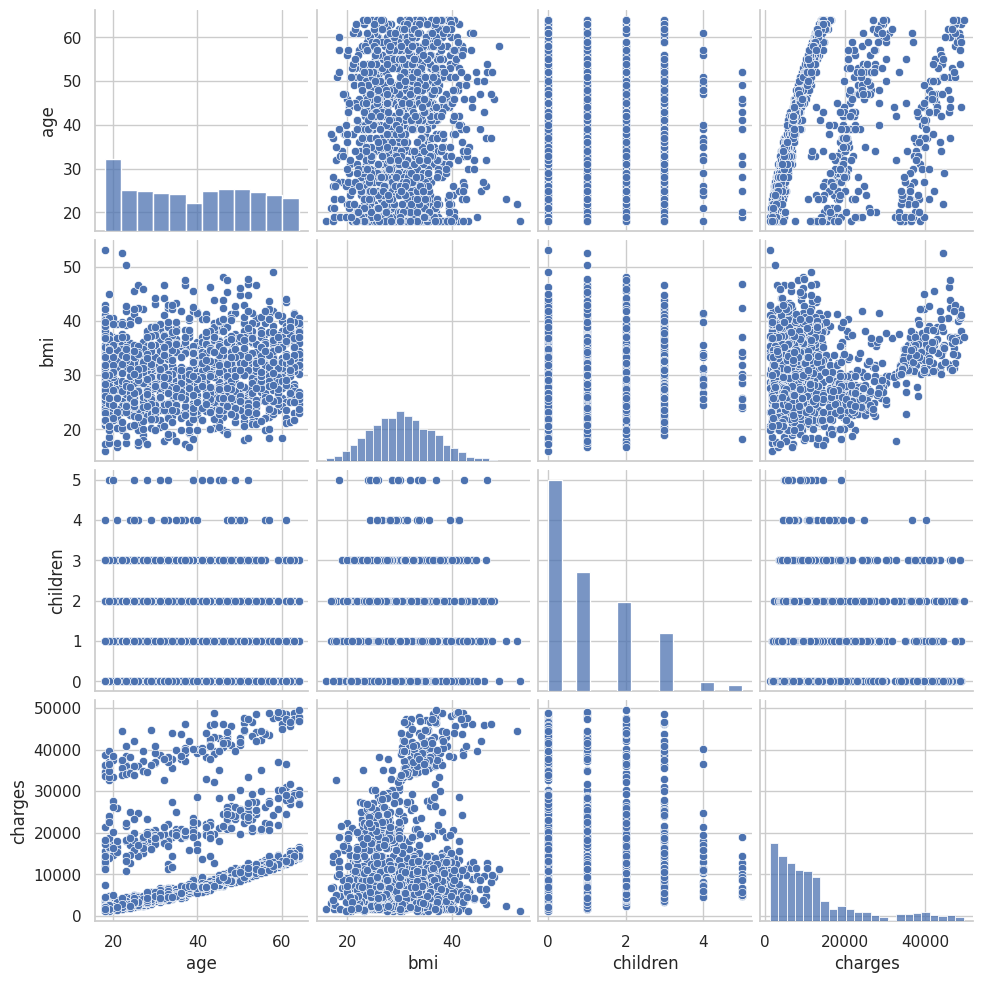

In [35]:
sns.pairplot(df, height=2.5)
plt.show()

### Interesting hints to observe:

- There are 3 different groups of people that are classified by age / position, this may be a point to analyze later.

- In general, the values are distributed as expected. With extreme values in the case of charges, nonetheless, this is to be expected as hospital charges can vary greatly for staying an extra day in the hospital or even for extra procedures

- It seems the data is clean, the body mass index variable is distributed in a normal or Gaussian way, which would be expected in an index of this type.

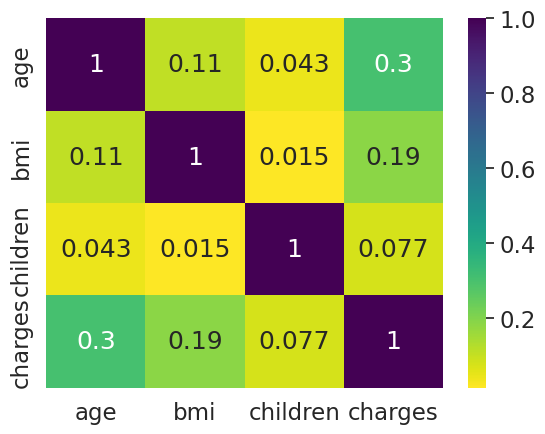

In [38]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, cmap='viridis_r', yticklabels=numeric_cols,xticklabels=numeric_cols)
plt.show()

### Other variables usage:

- Convert categorical variable into dummy/indicator variables.

- The remaining are categorical variables, sex, smoker, region. 

- In order to use them I'll use the get_dummies function of pandas.

In [39]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Creating Models 

Let's first off use a model with all variables in order to understand its behaviour.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
X_cols = list(set(df.columns)-set(['charges']))
X = df.drop(columns = ['charges'])
y = df[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Let's check how is performing so far

In [42]:
y_pred.shape

(333, 1)

### Metric Functions

- Let's delve in & calculate the model metrics

- I'll import metrics to see how the models have been performing 

In [43]:
import sklearn.metrics as metrics

In [44]:
# Mean Squared Error (M.S.E)
mse = metrics.mean_squared_error(y_test,y_pred)
# R-Squared
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7641
mse:  0.277


### Let's check on outcome's summary

- Let's clean up the model data in order to make it easier for the interceptor reading & so on.

In [45]:
# Assign it the value
model.intercept_ = model.intercept_[0]
# Allows stats to apply the function use "intercept and coef properly" as need it
model.coef_ = model.coef_.reshape(-1)

In [46]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median    3Q   Max
-1.9177 -0.1563  0.0837 0.255 0.922


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.000000    0.029049  -0.0000  1.000000
region_southeast  0.310221    0.028939  10.7198  0.000000
bmi               0.174677    0.028109   6.2142  0.000000
age               0.063585    0.027964   2.2738  0.023618
sex_male         -0.009510    0.029043  -0.3274  0.743544
region_northwest  0.790193    0.027197  29.0549  0.000000
smoker_yes       -0.021861    0.034488  -0.6339  0.526610
children         -0.049925    0.034972  -1.4276  0.154361
region_southwest -0.029846    0.033923  -0.8798  0.379591
---
R-squared:  0.76405,    Adjusted R-squared:  0.75823
F-statistic: 131.15 on 8 features


Finally, let's invoke the residuals function.It is important to note that it's just a simple subtraction between the actual and predicted values.

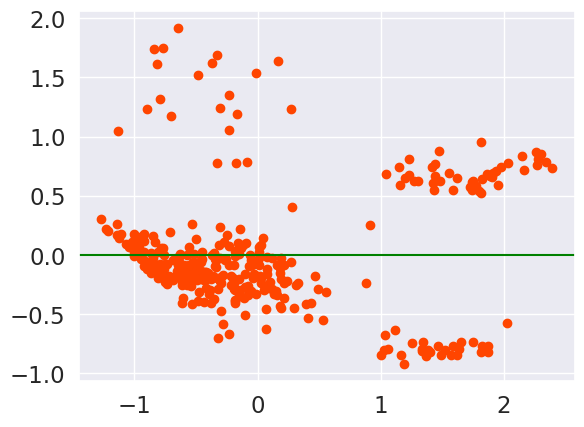

In [47]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals, color='orangered')
# Let's set a line for better understanding
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

### Second Model

- These above outcome are going well, nonetheless, they can be improved. 

- We will try to make some transformations on the variables that can be useful

In [48]:
# Let's make a copy of the dataset
df_second = df.copy()
# I'll add a new variable which is Age-squared
df_second['age2'] = df_second.age**2
# A variable that show me the weight using BMI as reference
df_second['overweighted'] = (df_second.bmi >= 30).astype(int)
# Gathering two conditions as one
df_second['overweighted*smoker'] = df_second.overweighted * df_second.smoker_yes

### Analyzing The Second Model

Note: This model can be optimize through a function. I just did it this way in order to explain each step. If you want to use this model, feel free to customize it!

In [49]:
X_cols = list(set(df_second.columns)-set(['charges']))
X = df_second.drop(columns = ['charges'])
y = df_second[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [50]:
y_pred.shape

(333, 1)

In [51]:
# Mean Squared Error (M.S.E)
mse = metrics.mean_squared_error(y_test,y_pred)
# R-Squared
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8659
mse:  0.0922


In [52]:
# Assign it the value
model.intercept_ = model.intercept_[0]
# Allows stats to apply the function use "intercept and coef properly" as need it
model.coef_ = model.coef_.reshape(-1)

In [53]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-1.7082 0.0667  0.1072 0.1412 0.3633


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           0.000000    0.016965   0.0000  1.000000
region_southeast    -0.099571    0.085336  -1.1668  0.244127
bmi                  0.053137    0.026738   1.9873  0.047706
age                  0.081413    0.017432   4.6704  0.000004
age2                -0.015703    0.016821  -0.9336  0.351208
overweighted         0.454631    0.020721  21.9405  0.000000
sex_male            -0.013250    0.019299  -0.6866  0.492839
region_northwest    -0.034932    0.020244  -1.7255  0.085363
smoker_yes          -0.039789    0.019587  -2.0314  0.043010
overweighted*smoker  0.409735    0.085153   4.8118  0.000002
children            -0.037740    0.026873  -1.4044  0.161148
region_southwest     0.491930    0.026804  18.3525  0.000000
---
R-squared:  0.86587,    Adjusted R-squared:  0.86127
F-statistic: 188.38 o

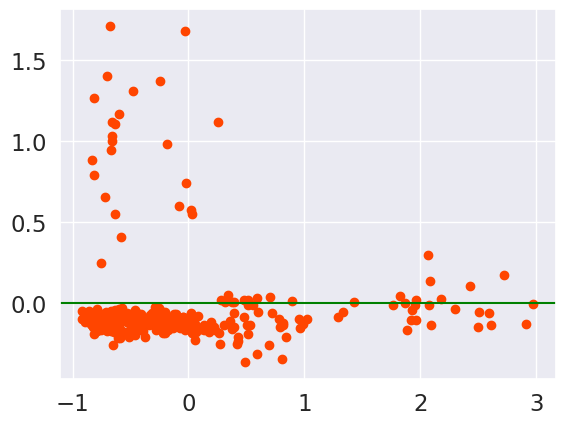

In [54]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals, color='orangered')
# Let's set a line for better understanding
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

### Second Model Optimized

- Let's now call up those colums which P-Value thowrn was 0.0... and so on

- Let's re build the model one more time just invoking the neede it colums:

In [55]:
# Let's make a copy of the dataset
df_second = df.copy()
# I'll add a new variable which is Age-squared
df_second['age2'] = df_second.age**2
# A variable that show me the weight using BMI as reference
df_second['overweighted'] = (df_second.bmi >= 30).astype(int)
# Gathering two conditions as one
df_second['overweighted*smoker'] = df_second.overweighted * df_second.smoker_yes

In [56]:
X_cols = ['overweighted*smoker', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_second[X_cols].values
Y = df_second[y_col].values


# X = df_second.drop(columns = ['charges'])
# y = df_second[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [57]:
y_pred.shape

(333, 1)

In [58]:
# Mean Squared Error (M.S.E)
mse = metrics.mean_squared_error(y_test,y_pred)
# R-Squared
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8558
mse:  0.1341


In [59]:
# Assign it the value
#model.intercept_ = model.intercept_[0]
# Allows stats to apply the function use "intercept and coef properly" as need it
model.coef_ = model.coef_.reshape(-1)

In [60]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-1.9106 0.0643   0.111 0.1345 0.4312


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           0.000000    0.020102   0.0000  1.000000
overweighted*smoker  0.489957    0.026270  18.6506  0.000000
smoker_yes           0.463978    0.024505  18.9340  0.000000
age2                 0.322623    0.021115  15.2796  0.000000
children             0.066820    0.020382   3.2784  0.001155
---
R-squared:  0.85578,    Adjusted R-squared:  0.85402
F-statistic: 486.59 on 4 features


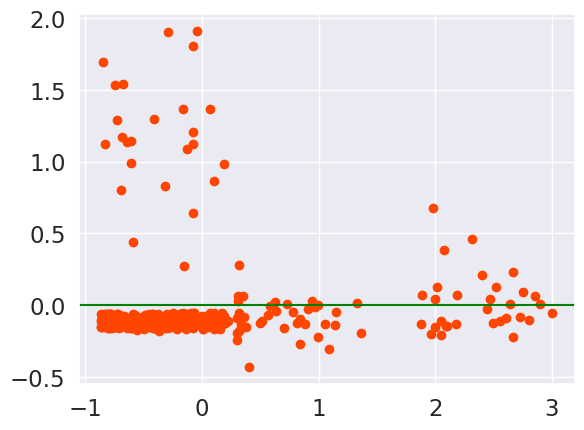

In [61]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals, color='orangered')
# Let's set a line for better understanding
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4d76295-6ea4-4f6f-9480-7726cf21acff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>